In [1]:
import numpy as np
import torch
import gpytorch
from typing import Optional
from cdt.data import load_dataset
from sklearn.preprocessing import scale, minmax_scale
import matplotlib.pyplot as plt
import warnings

from IPython import display
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'

from tcep_utils import cut_num_pairs,ensemble_score,_get_wd

Detecting 1 CUDA device(s).
sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.


In [2]:
# Most likely HTR GP, as seen in
# https://github.com/pytorch/botorch/
# Implementing the most likely heteroskedastic GP
from gpRegressors import MostLikelyHeteroGP

In [3]:
data, labels = load_dataset('tuebingen')
cut_num_pairs(data,num_max=2000)

In [4]:
index = 21
pair = data.iloc[index]
pair = (scale(pair['A']), scale(pair['B']))

N = pair[0].shape[0]
N

450

In [5]:
x_tr,y_tr = torch.from_numpy(pair[0]).float().to('cuda:0'), torch.from_numpy(pair[1]).to('cuda:0').float()
x_tr, y_tr = x_tr.view(-1,1), y_tr.view(-1,1)

In [6]:
mlhgp = MostLikelyHeteroGP(
                        x_tr=x_tr,
                        y_tr=y_tr,
                        max_iter=100)

initializing the homoskedastic GP.


In [7]:
def plot_gp(test_x, posterior_f_vals, posterior_targets):
    
    # get the conditional mean and upper,lower confidence
    # for both the posterior (uncertainty about the parameters)
    # and the targets (uncertainty due to parameters and noise)
    mean_low, mean_up = posterior_f_vals.confidence_region()
    pred_mean = posterior_targets.mean
    lower, upper = posterior_targets.confidence_region()
    plt.plot(x_tr.cpu().detach().numpy(), y_tr.cpu().detach().numpy(), 'o', fillstyle='none', markersize=4)
    # Plot predictive means as blue line
    plt.plot(test_x.cpu().detach().numpy(), pred_mean.cpu().detach().numpy(), 'b')
    # Plot confidence bounds as lightly shaded region
    plt.fill_between(test_x.cpu().detach().numpy(),
                     mean_low.cpu().detach().numpy().ravel(),
                     mean_up.cpu().detach().numpy().ravel(),
                     alpha=0.35,
                     color='b')
    plt.fill_between(test_x.cpu().detach().numpy(),
                     lower.cpu().detach().numpy().ravel(),
                     upper.cpu().detach().numpy().ravel(),
                     alpha=0.25,
                     color='royalblue')
    plt.legend(['Mean', 'Observed Data', 'Posterior Confidence',
               'Posterior Predictive Confidence'])
    plt.xlabel('X')
    plt.ylabel('Y')
    
    plt.show()

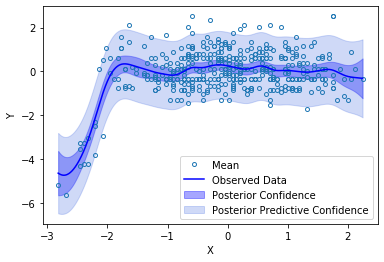

fitting hetero model at step  0
success, replacing old MLL.


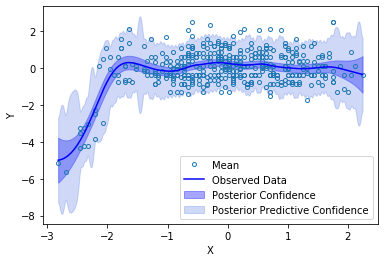

1
fitting hetero model at step  1
success, replacing old MLL.


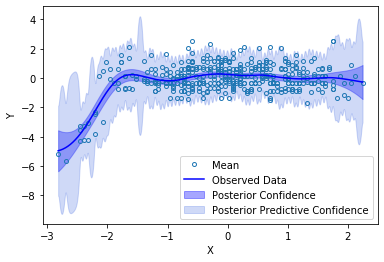

2
fitting hetero model at step  2
success, replacing old MLL.


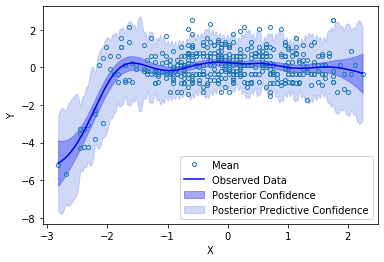

3
fitting hetero model at step  3
success, replacing old MLL.


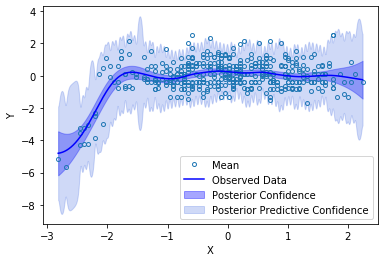

4
fitting hetero model at step  4
success, replacing old MLL.


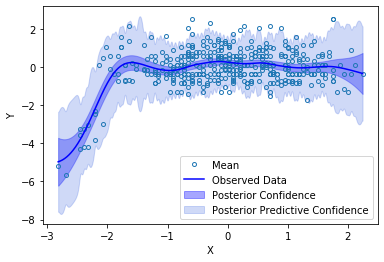

5
fitting hetero model at step  5
success, replacing old MLL.


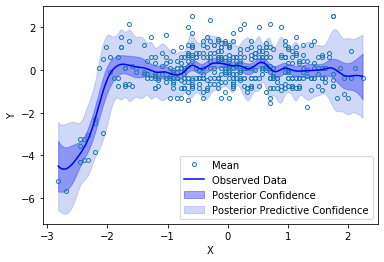

6
fitting hetero model at step  6
success, replacing old MLL.


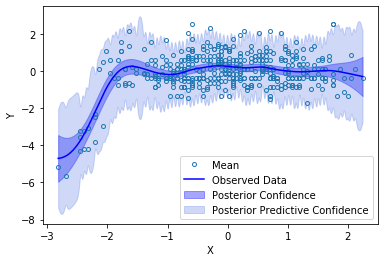

7
fitting hetero model at step  7
success, replacing old MLL.


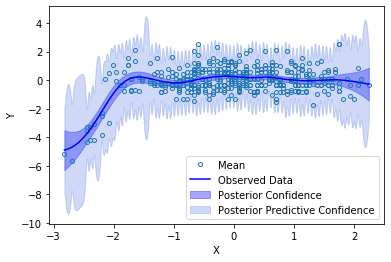

8
fitting hetero model at step  8
success, replacing old MLL.


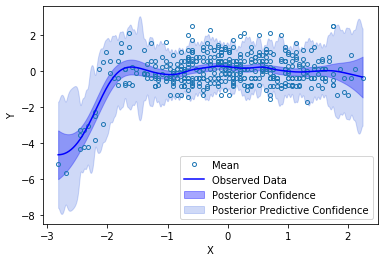

9
fitting hetero model at step  9
success, replacing old MLL.


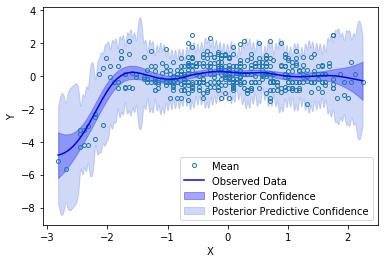

10
fitting hetero model at step  10
success, replacing old MLL.


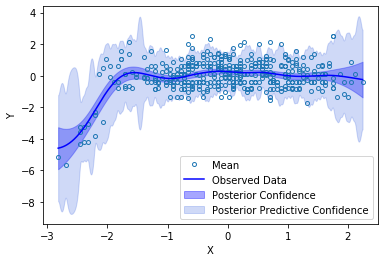

11
fitting hetero model at step  11
success, replacing old MLL.


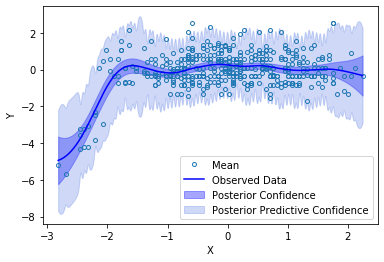

12
fitting hetero model at step  12
success, replacing old MLL.


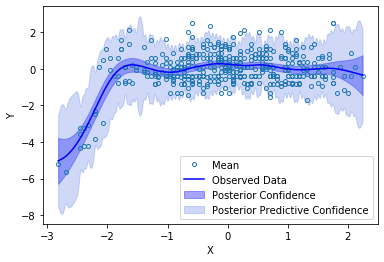

13
fitting hetero model at step  13
success, replacing old MLL.


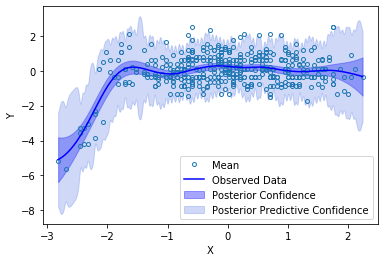

14
fitting hetero model at step  14
success, replacing old MLL.


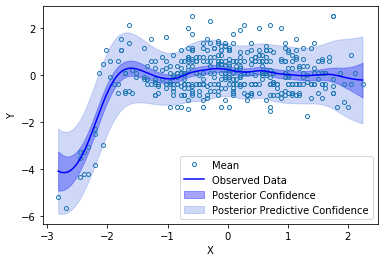

15
fitting hetero model at step  15
success, replacing old MLL.


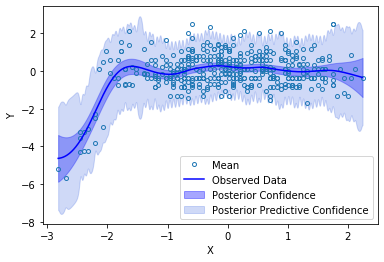

16
fitting hetero model at step  16
success, replacing old MLL.


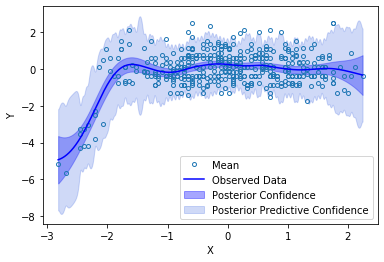

17
fitting hetero model at step  17
success, replacing old MLL.


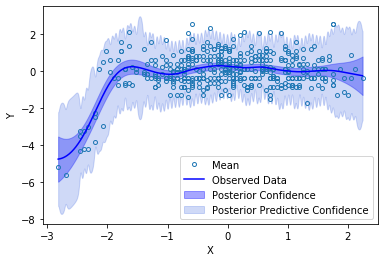

18
fitting hetero model at step  18
success, replacing old MLL.


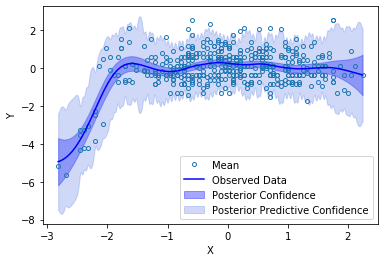

19
fitting hetero model at step  19
success, replacing old MLL.


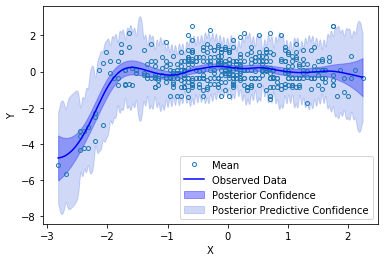

20
fitting hetero model at step  20
success, replacing old MLL.


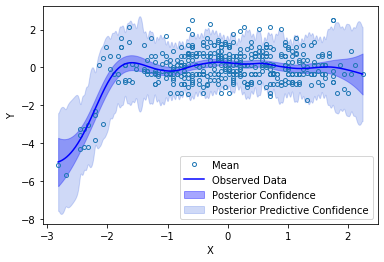

21
fitting hetero model at step  21
success, replacing old MLL.


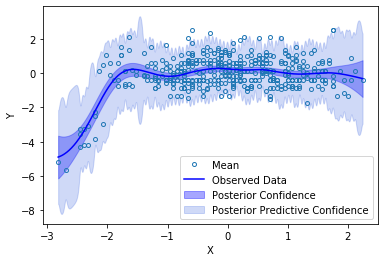

22
fitting hetero model at step  22
success, replacing old MLL.


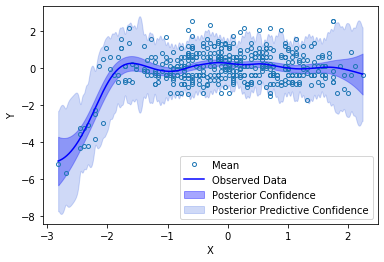

23
fitting hetero model at step  23
success, replacing old MLL.


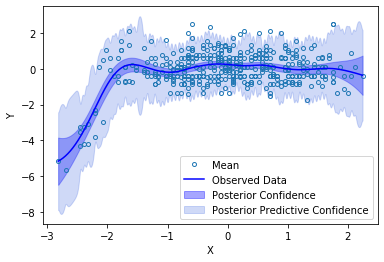

24
fitting hetero model at step  24
success, replacing old MLL.


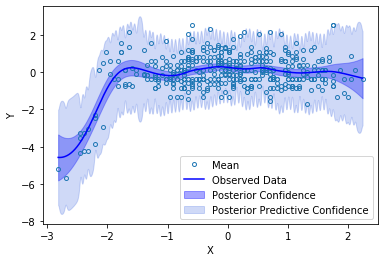

25
fitting hetero model at step  25
success, replacing old MLL.


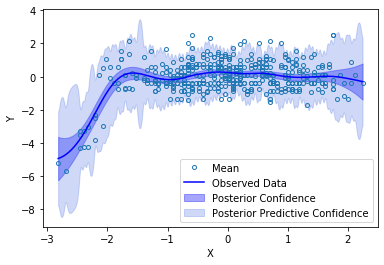

26
fitting hetero model at step  26
success, replacing old MLL.


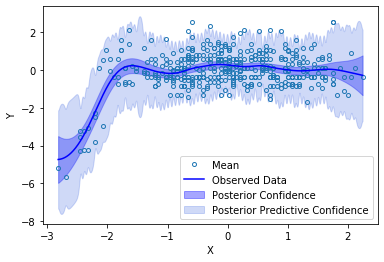

27
fitting hetero model at step  27
success, replacing old MLL.


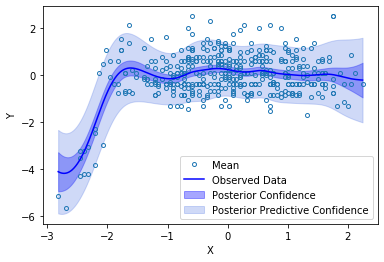

28
fitting hetero model at step  28
success, replacing old MLL.


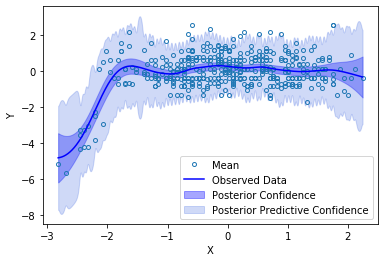

29
fitting hetero model at step  29
success, replacing old MLL.


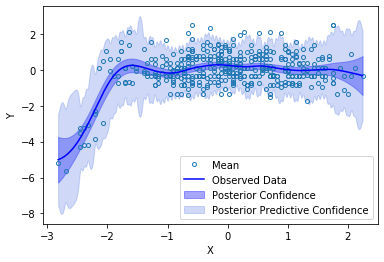

30
fitting hetero model at step  30
success, replacing old MLL.


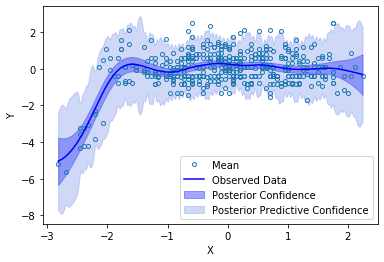

31
fitting hetero model at step  31
success, replacing old MLL.


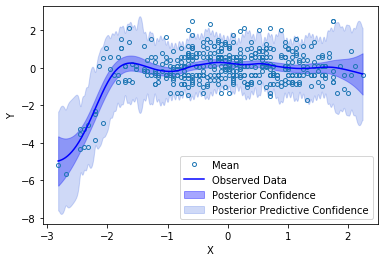

32
fitting hetero model at step  32
success, replacing old MLL.


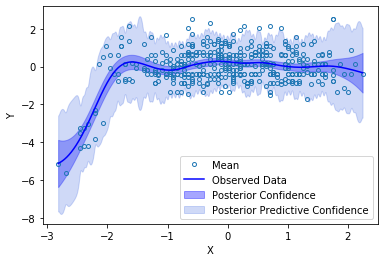

33
fitting hetero model at step  33
success, replacing old MLL.


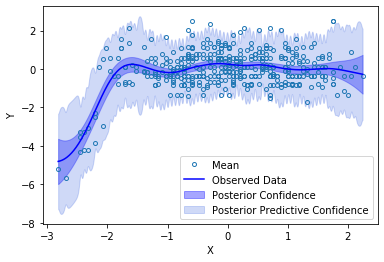

34
fitting hetero model at step  34
success, replacing old MLL.


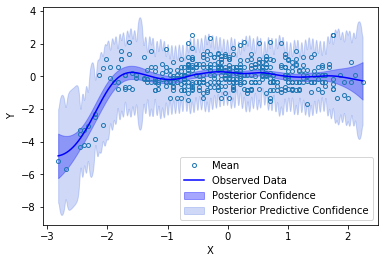

35
fitting hetero model at step  35
success, replacing old MLL.


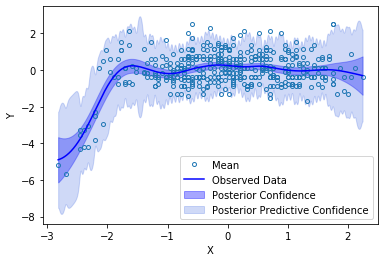

36
fitting hetero model at step  36
success, replacing old MLL.


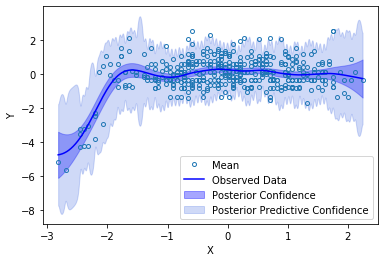

37
fitting hetero model at step  37
success, replacing old MLL.


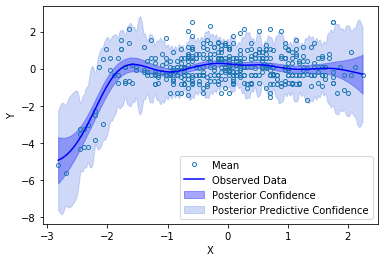

38
fitting hetero model at step  38
success, replacing old MLL.


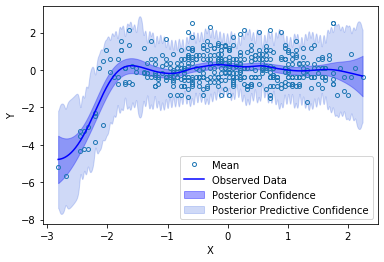

39
fitting hetero model at step  39
success, replacing old MLL.


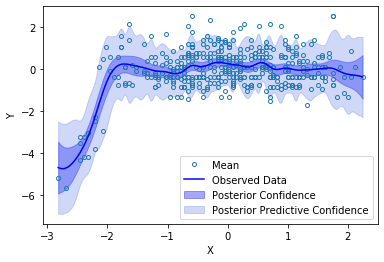

40
fitting hetero model at step  40
success, replacing old MLL.


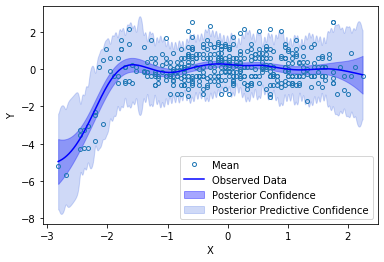

41
fitting hetero model at step  41
success, replacing old MLL.


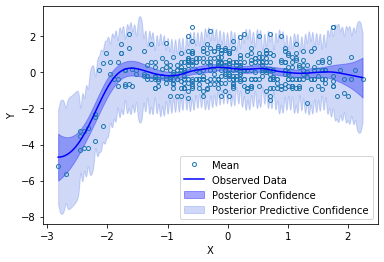

42
fitting hetero model at step  42
success, replacing old MLL.


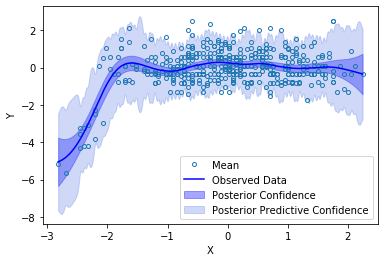

43
fitting hetero model at step  43
success, replacing old MLL.


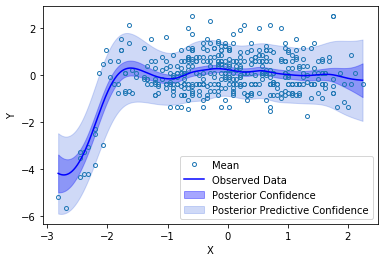

44
fitting hetero model at step  44
success, replacing old MLL.


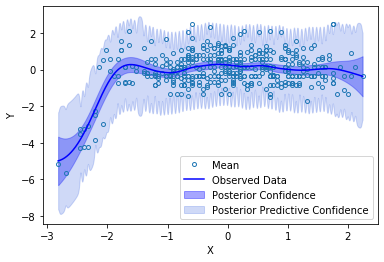

45
fitting hetero model at step  45
success, replacing old MLL.


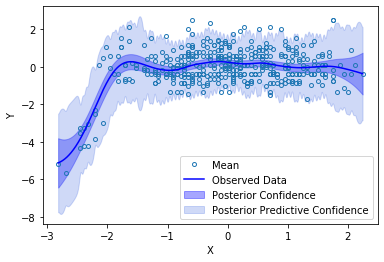

46
fitting hetero model at step  46
success, replacing old MLL.


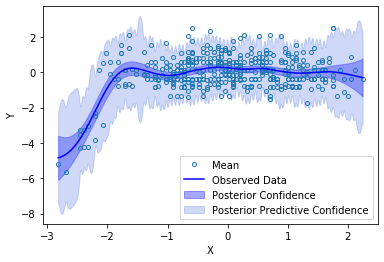

47
fitting hetero model at step  47
success, replacing old MLL.


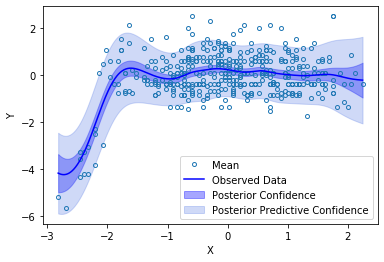

48
fitting hetero model at step  48
success, replacing old MLL.


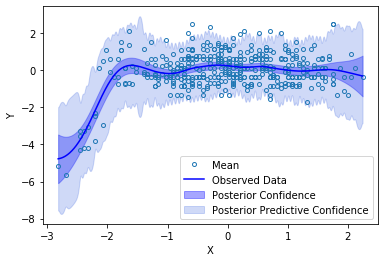

49
fitting hetero model at step  49
aborted training. category must be a Warning subclass, not 'RuntimeError'


TypeError: category must be a Warning subclass, not 'RuntimeError'

In [8]:
# see the initial homoskedastic GP
plot_gp(*mlhgp.visualize_predicitions())

N = 100

for i in range(N):
    mlhgp.train(1)
    plot_gp(*mlhgp.visualize_predicitions())
    print(mlhgp.step_n)